## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
from utils import sigmoid
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

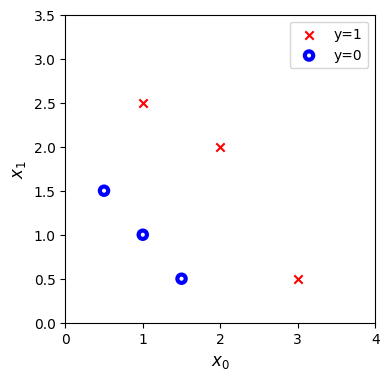

In [8]:
fig,ax = plt.subplots(1,1,figsize=(4,4),sharey=True)

def plot_data(X,y,ax,pos_label="y=1",neg_label="y=0"):
    pos = y == 1 
    neg = y == 0 
    ax.scatter(X[pos,0],X_train[pos,1],c='r',marker='x',label=pos_label)
    ax.scatter(X[neg,0],X_train[neg,1],marker='o',label=neg_label,edgecolors="blue",facecolors="none",linewidths=3)

plot_data(X_train,y_train,ax)
ax.axis([0,4,0,3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.legend()
plt.show()

In [9]:
def compute_cost_logistic(X,y,w,b):
    """ 
    Computes cost function for logistic function 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0

    for i in range(m):
      z_i = np.dot(X[i],w) + b 
      f_wb_i = sigmoid(z_i)
      loss_i = -(y[i] * np.log(f_wb_i) +(1-y[i]) * np.log(1-f_wb_i))
      cost += loss_i

    return cost/m
    

In [10]:
w_in = np.array([1,1])
b_in = -3
print(compute_cost_logistic(X_train,y_train,w_in,b_in))

0.36686678640551745


Let's plot two decision two decison boundaries:
$$
\begin{align}
{w_0} = 1, {w_1} = 1 , b = -3\\
    \left({x_0} + {x_1} - 3 = 0 \right) \tag{1}\\
    {w_0} = 1, {w_1} = 1 , b = -4\\
    \left({x_0} + {x_1} - 4 = 0 \right) \tag{2} 
\end{align}
$$ 

$(eqn_1)$ in `blue` color <br>
$(eqn_2)$ in `red` color

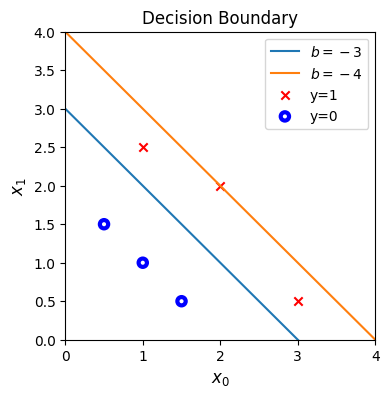

In [11]:
#### Plot decision boundaries #####
# Choose values between 0 and 6
x0 = np.arange(0,6)
# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0
fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.axis([0,4,0,4])
ax.plot(x0,x1,label="$b = -3$")
ax.plot(x0,x1_other,label="$b = -4$")
plot_data(X_train,y_train,ax)
ax.legend()
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [12]:
from copy import deepcopy
w_1 = np.array([1,1])
b_1 = -3 
w_2 = deepcopy(w_1)
b_2 = 4 

print("Cost for b = -3 : ", compute_cost_logistic(X_train,y_train,w_1,b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train,y_train,w_2,b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  3.0014780541228254
